In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import models, layers
from IPython.display import SVG
from keras.utils import model_to_dot
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 加载训练数据和测试数据
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
# 对训练数据和测试数据进行归一化
X_train = train_data.drop(columns=['label']).values / 255.0
Y_train = train_data['label'].values
X_test = test_data.values / 255.0

In [5]:
# 调整数据的形状以适应模型
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [6]:
# 将训练数据集划分为训练集和验证集
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=46)

In [7]:
# 对标签进行独热编码
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)

In [10]:
def build_model(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# 调用函数构建模型
model = build_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        2

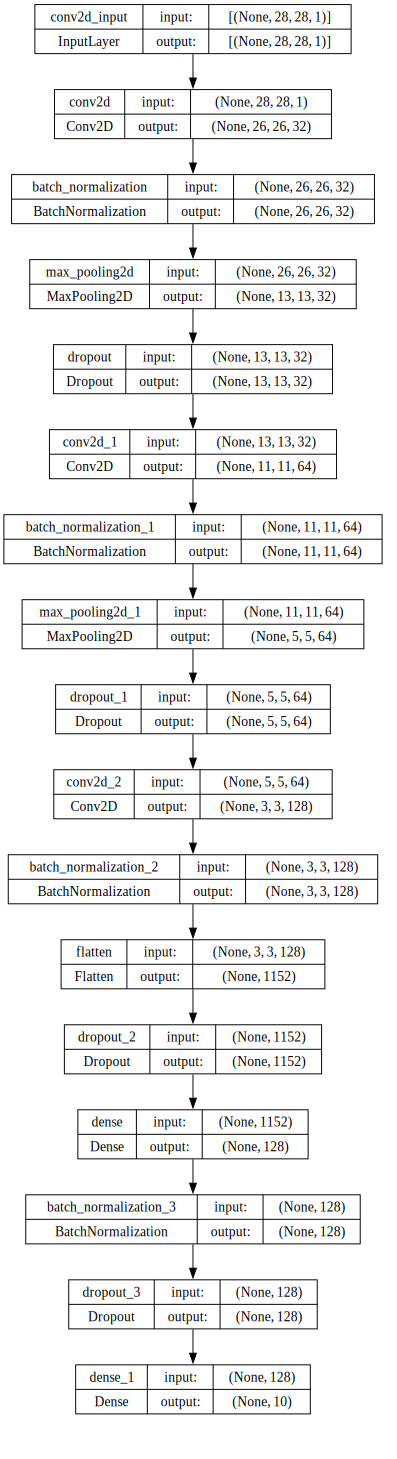

In [11]:
model.summary()
SVG(model_to_dot(model,show_shapes=True,dpi=70).create(prog='dot', format='svg'))

In [12]:
# 模型训练
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/10
525/525 [==============================] - 27s 47ms/step - loss: 0.4077 - accuracy: 0.8755 - val_loss: 0.5597 - val_accuracy: 0.8230
Epoch 2/10
525/525 [==============================] - 22s 43ms/step - loss: 0.1286 - accuracy: 0.9596 - val_loss: 0.0622 - val_accuracy: 0.9796
Epoch 3/10
525/525 [==============================] - 23s 44ms/step - loss: 0.0970 - accuracy: 0.9696 - val_loss: 0.0425 - val_accuracy: 0.9865
Epoch 4/10
525/525 [==============================] - 23s 44ms/step - loss: 0.0820 - accuracy: 0.9743 - val_loss: 0.0386 - val_accuracy: 0.9881
Epoch 5/10
525/525 [==============================] - 22s 42ms/step - loss: 0.0675 - accuracy: 0.9782 - val_loss: 0.0344 - val_accuracy: 0.9893
Epoch 6/10
525/525 [==============================] - 22s 42ms/step - loss: 0.0611 - accuracy: 0.9813 - val_loss: 0.0420 - val_accuracy: 0.9869
Epoch 7/10
525/525 [==============================] - 21s 41ms/step - loss: 0.0582 - accuracy: 0.9825 - val_loss: 0.0332 - val_accuracy:

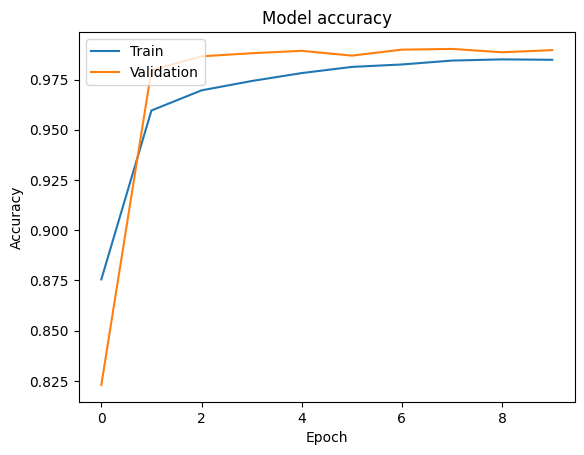

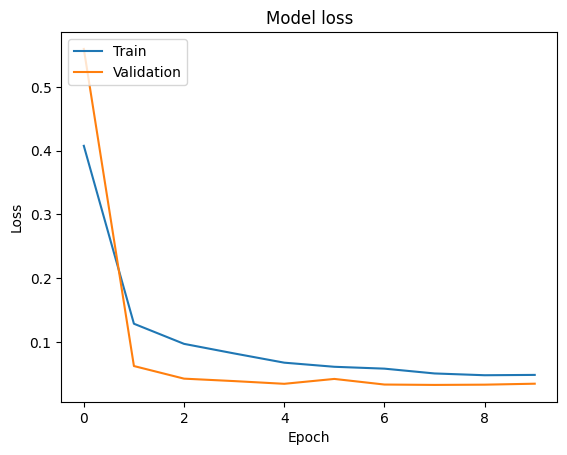

In [13]:
# 对训练过程的损失和准确率进行可视化
def plot_history(history):
    # 准确率
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # 损失率
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
plot_history(history)

In [14]:
# 对预测集的结果进行预测并可视化
predictions = model.predict(X_val)

263/263 [==============================] - 2s 7ms/step


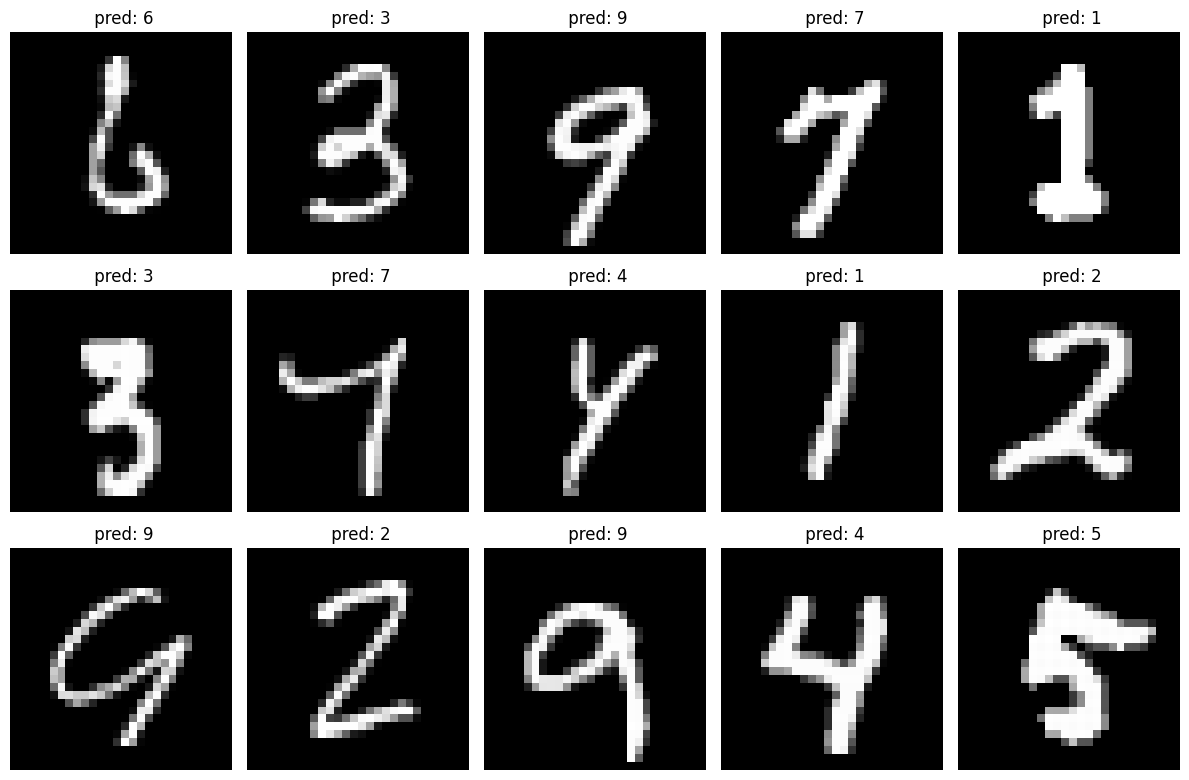

In [15]:
def visualize_predictions(X_val, predictions, num_examples=15):
    plt.figure(figsize=(12, 8))
    
    # Calculate the number of rows needed (assuming 2 rows)
    num_rows = 3
    num_columns = num_examples // num_rows
    
    for i in range(num_examples):
        index = np.random.randint(0, len(X_val))
        image = X_val[index].reshape(28, 28)
        actual_label = Y_val[index]
        predicted_label = np.argmax(predictions[index])

        # Adjusting subplot parameters for two rows
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f' pred: {predicted_label}')
        plt.axis('off')
    
    # Automatically adjust subplot parameters to give specified padding
    plt.tight_layout()
    
    plt.show()

# 调用可视化函数
visualize_predictions(X_val, predictions)


In [16]:
# 对测试集进行预测
y_pred = model.predict(X_test)
predictions1 = []
for it in y_pred:
    predictions1.append(np.argmax(it))

875/875 [==============================] - 6s 7ms/step


In [17]:
# 将预测结果存储在csv文件中
submission = pd.DataFrame({
    "ImageId":range(1, 28001),
    "Label":predictions1
})

In [18]:
submission.to_csv('submission.csv', index = False)